logistic regression is a classification algorithm that can be used for binary classification. It is also known as a logistic regression model. can be used for
    1. Binary classification
2. multiclass classification
3. multilabel classification

In [12]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [13]:
#sns dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
#preprocess the data
#drop deck column
df.drop('deck',axis=1,inplace=True)
#impute missing values
df['age']=df['age'].fillna(df['age'].mean())
df['fare']=df['fare'].fillna(df['fare'].mean())
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])
df['emabared']=df['embarked'].fillna(df['embarked'].mode()[0])


In [15]:
#encode categorical variables using for loop
for col in df.columns:
    if df[col].dtype=='object'or df[col].dtype=='category':
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,emabared
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False,2
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True,2
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False,2
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True,2


In [17]:
# x and y column
X=df.drop('survived',axis=1)
y=df['survived']

In [18]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [20]:
#model
lr=LogisticRegression()
lr.fit(X_train,y_train)


c:\Users\HP\.conda\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
#predict and evaluate
y_pred=lr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       120

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295

[[175   0]
 [  0 120]]


Text(0.5, 25.722222222222214, 'Predicted label')

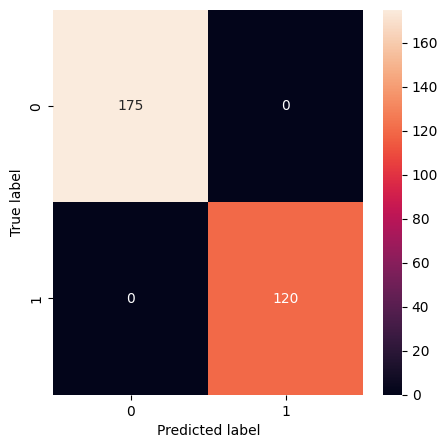

In [29]:
#plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
#label
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [31]:
#save the model
import pickle
pickle.dump(lr,open('./saved_models/02_logis_reg.pkl','wb'))